# JEST internal workshop &#8594; Intro to OpenCV (Crash Course) # 1/4

![](https://raw.githubusercontent.com/tamagusko/workshop-intro-opencv/main/img/head.png)

## Basic info
Version: 0.1 (2021-09-22)  
© Tiago Tamagusko (tamagusko@uc.pt)<br>
License: [LICENSE](/LICENSE)

## Requirements

- Have a Google account.

## Installation

Go to the [link](https://colab.research.google.com/github/tamagusko/workshop-intro-opencv/blob/main/introOpenCV.ipynb) and make a copy.


## Topics

1. [Open Computer Vision (OpenCV) fundamentals ](introOpenCV.ipynb) (15 min);
2. [Edge detection](edgeDetection.ipynb)  (15 min);
3. [Cascade classification](cascade.ipynb) (15 min);
4. [Traffic light detection](trafficLightDetection.ipynb) (15 min).
---

## 1. OpenCV
Estimated time needed: **15 min**

See more at [A brief introduction to OpenCV](https://ieeexplore.ieee.org/document/6240859)

In [3]:
import cv2 # opencv
import numpy as np

%matplotlib inline 
from matplotlib import pyplot as plt
import pylab # control figure size 
pylab.rcParams['figure.figsize'] = (10, 8)

In [4]:
# check OpenCV version
cv2.__version__

'4.5.3'

In [5]:
# download images

!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/coimbra.jpg \
    -O img/coimbra.jpg
      
!wget --no-check-certificate \
    https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/rectangle.png \
    -O img/rectangle.png

--2021-09-20 14:08:08--  https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/coimbra.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 710131 (693K) [image/jpeg]
Saving to: ‘img/coimbra.jpg’

img/coimbra.jpg     100%[===================>] 693,49K  --.-KB/s    in 0,09s   

2021-09-20 14:08:09 (7,28 MB/s) - ‘img/coimbra.jpg’ saved [710131/710131]

--2021-09-20 14:08:09--  https://raw.githubusercontent.com/tamagusko/intro_opencv/main/img/rectangle.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5306 (5,2K) [image/

In [6]:
# open image
coimbra=cv2.imread('img/coimbra.jpg')

In [7]:
# getting image properties
def image_measure(img):
    height, width  = img.shape[:2]
    return width, height

print('Image properties: \n---')
print(f'Size: {coimbra.size} \nShape: {image_measure(coimbra)} \nType: {coimbra.dtype}')

Image properties 
---
Size: 9437184 
Shape: (2048, 1536) 
Type: uint8


### Original image

![](https://raw.githubusercontent.com/tamagusko/workshop-intro-opencv/main/img/coimbra.jpg)

### OpenCV stored image:

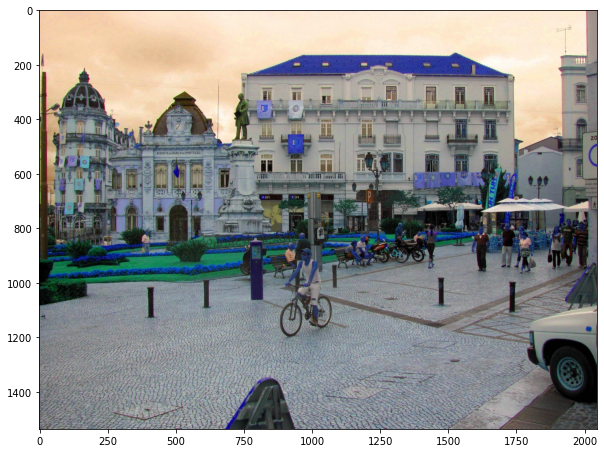

In [8]:
plt.imshow(coimbra)

# in a .py application use: cv2.imshow(coimbra) 

IMPORTANT: OpenCV does not store images in RGB format, but in BGR format.

### Converting the image to standard RGB

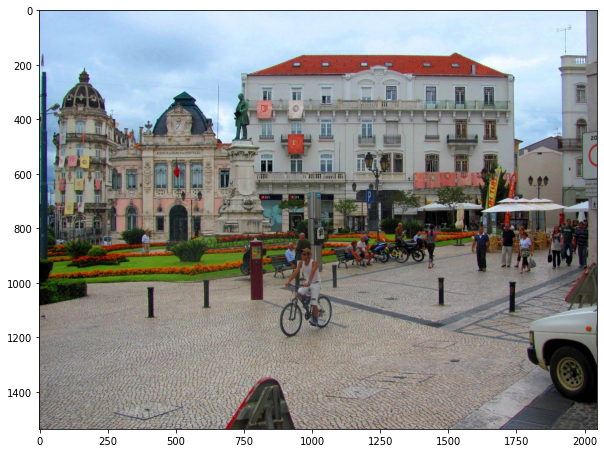

In [9]:
# split color channels
b,g,r=cv2.split(coimbra)
rgb_image=cv2.merge([r,g,b])

plt.imshow(rgb_image)

### There is an OpenCV function to convert the image to RGB

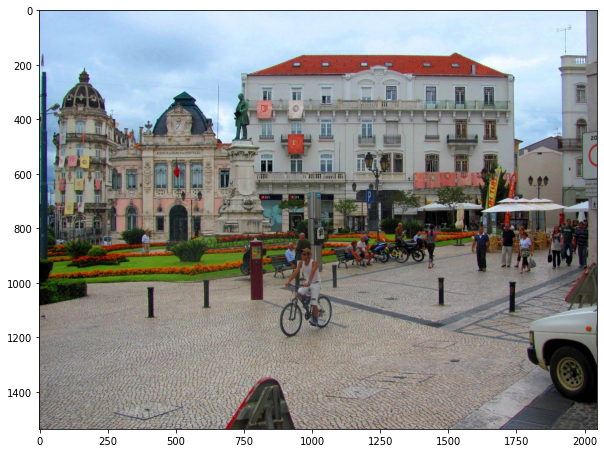

In [10]:
rgb_image_2=cv2.cvtColor(coimbra, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image_2)

### Slicing a part of the image

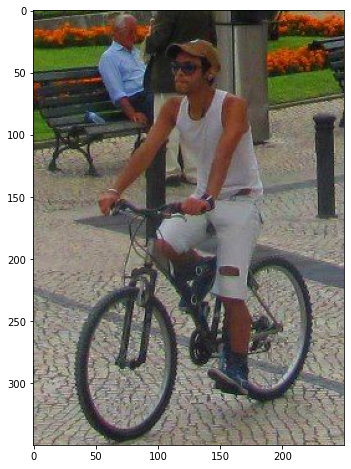

In [11]:
cyclist = rgb_image_2[850:1200, 850:1100]
plt.imshow(cyclist)

### Manipulating images

Images in OpenCV are numpy arrays, so you can easily manipulate the images.

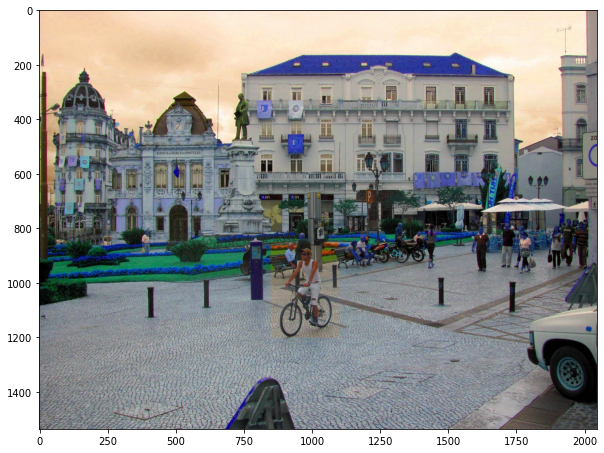

In [12]:
# slice + paste
image = np.copy(coimbra)
image[850:850+cyclist.shape[0], 850:850+cyclist.shape[1]]=cyclist
plt.imshow(image)

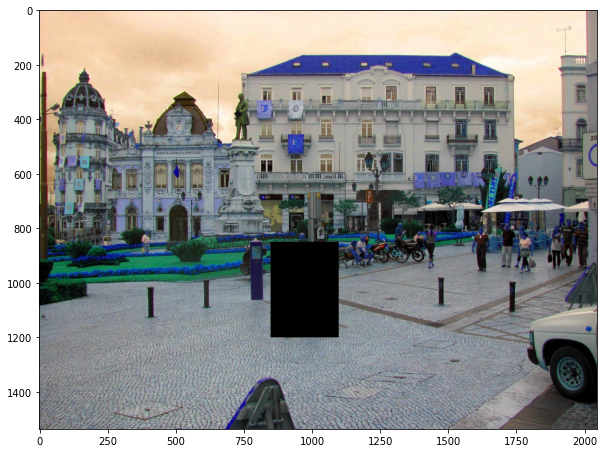

In [13]:
# covering an area of the figure
rectangle = np.zeros((cyclist.shape[0],cyclist.shape[1],3), np.uint8) # black rectangle
image[850:850+rectangle.shape[0], 850:850+rectangle.shape[1]]=rectangle
plt.imshow(image)

### Draw a retangle around a region

![](https://raw.githubusercontent.com/tamagusko/workshop-intro-opencv/main/img/rectangle.png)

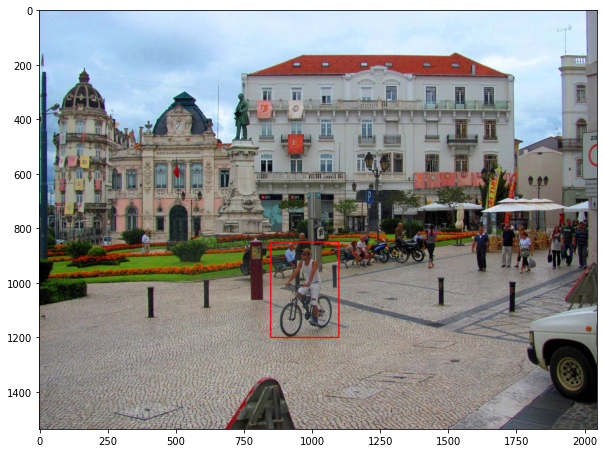

In [14]:
# cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
image_retangle = cv2.rectangle(
    rgb_image_2, # figure
    (850, 850), # x1, y1
    (1100, 1200), # x2, y2
    (255,0,0), # line color (red)
    3) # line width

plt.imshow(image_retangle)

### Write a text

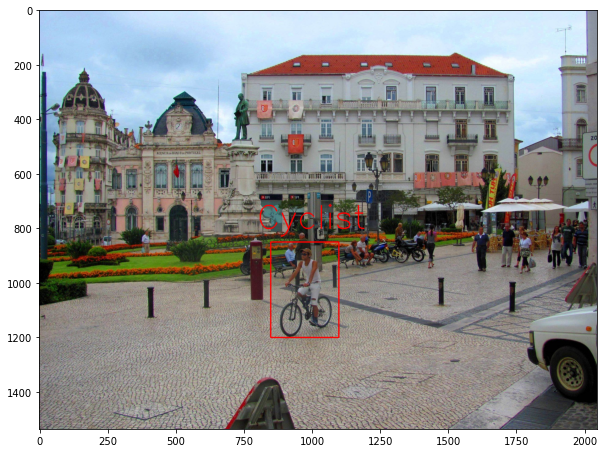

In [15]:
position = (800,800)
image_retangle_text = cv2.putText(
    image_retangle, # figure
    "Cyclist", 
    position,
    cv2.FONT_HERSHEY_SIMPLEX, # font
    4, # font size
    (255, 0, 0), # font color
    3) # font stroke

plt.imshow(image_retangle_text)

### Rotate image

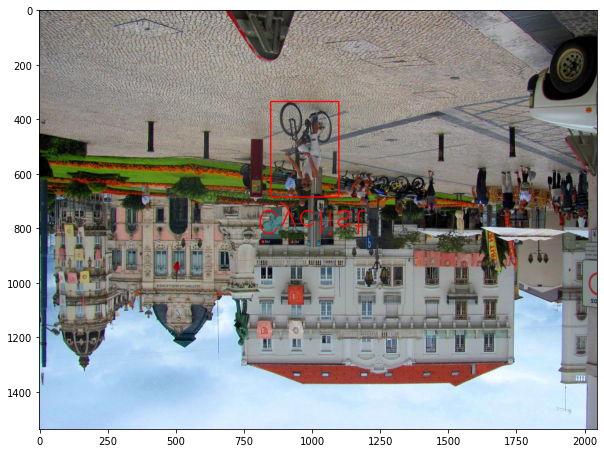

In [14]:
rotate_image_vertical=cv2.flip(rgb_image_2,0) # vertical
plt.imshow(rotate_image_vertical)

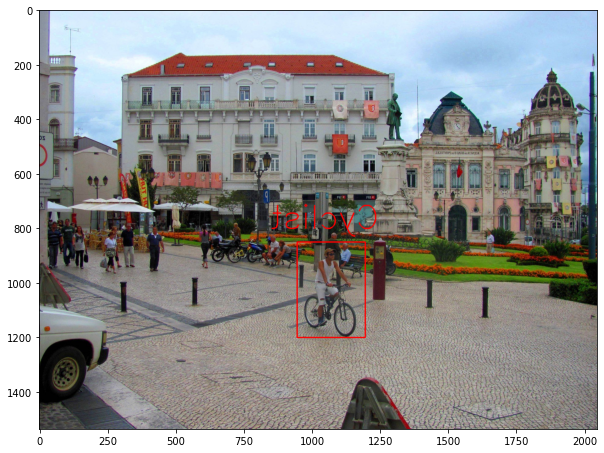

In [15]:
rotate_image_horizonal=cv2.flip(rgb_image_2,1) # horizontal
plt.imshow(rotate_image_horizonal)

[Go to edge detection](edgeDetection.ipynb)